In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import skimage 
from skimage import io, filters

In [5]:
import glob
import os

path = str(os.getcwd())
path = path + "/Fotos Analisis BIO399 Biología Sintética/Todo/*.tif"

archivos = glob.glob(path)
print (archivos[0:5])

['/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/Biologia Sintetica y Prototipado de Funciones Artificiales/Proyecto/Codes/Fotos Analisis BIO399 Biología Sintética/Todo/gota1.tif', '/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/Biologia Sintetica y Prototipado de Funciones Artificiales/Proyecto/Codes/Fotos Analisis BIO399 Biología Sintética/Todo/gota1_0.tif', '/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/Biologia Sintetica y Prototipado de Funciones Artificiales/Proyecto/Codes/Fotos Analisis BIO399 Biología Sintética/Todo/gota2.tif', '/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/Biologia Sintetica y Prototipado de Funciones Artificiales/Proyecto/Codes/Fotos Analisis BIO399 Biología Sintética/Todo/gota2_0.tif', '/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/Biologia Sintetica y Prototipado de Funciones Artificiales/Proyecto/Codes/Fotos Analisis BIO399 Biología Sintética/Todo/gota3.tif']


In [29]:
filename = archivos[32]
arname = filename[179:]

print(filename)
print(arname)

/Users/jorgeriverosvergara/Desktop/Universidad/10ºSemestre/Biologia Sintetica y Prototipado de Funciones Artificiales/Proyecto/Codes/Fotos Analisis BIO399 Biología Sintética/Todo/perlitas3.tif
perlitas3.tif


(1944, 2592, 3)


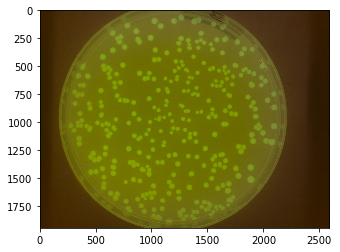

In [30]:
imagefile = plt.imread(filename)
print(imagefile.shape)
plt.imshow(imagefile, aspect='equal')

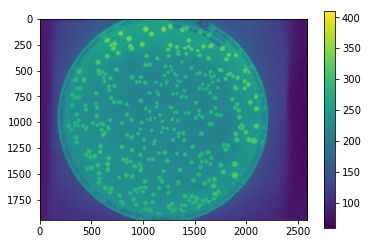

In [31]:
image_sum = imagefile.sum(axis=2)
plt.imshow(image_sum)
plt.colorbar()

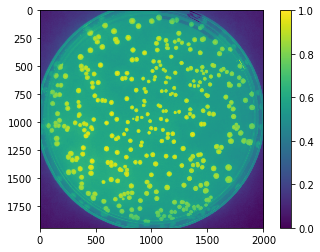

In [43]:
from skimage.filters import gaussian
g_image = gaussian(imagefile[:, 200:2200, 1], 1)
ng_image = (g_image-g_image.min())/(g_image.max()-g_image.min())

plt.imshow(ng_image)
plt.colorbar()

In [44]:
import skimage.feature as skfeat
A = skfeat.blob_log(ng_image, min_sigma=5.0, max_sigma=75.0, num_sigma=15, threshold=0.16, overlap=0.8)

print(A.shape)
print(A[0:5, :])

(231, 3)
[[ 1770.   892.    15.]
 [ 1745.   704.    15.]
 [ 1712.  1199.    15.]
 [ 1705.   569.    15.]
 [ 1699.   896.    15.]]


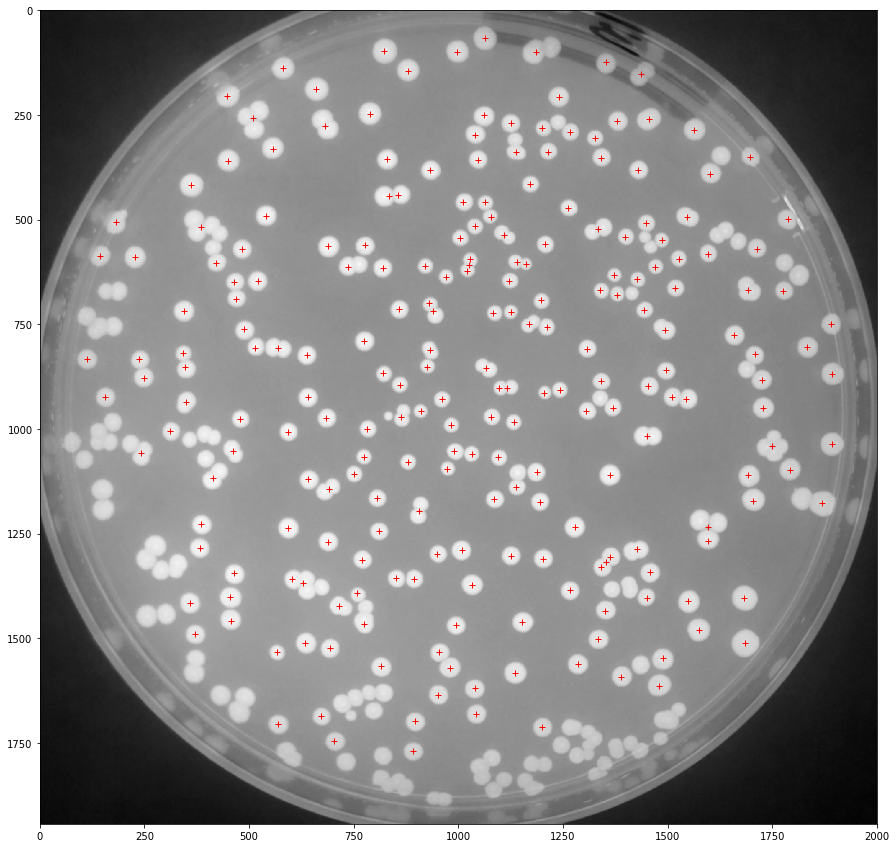

In [46]:
plt.figure(figsize=(15, 15))
plt.imshow(ng_image, cmap='gray')
#plt.hold(True)
for i in range(len(A)):
    plt.plot(A[i, 1], A[i, 0], 'r+')

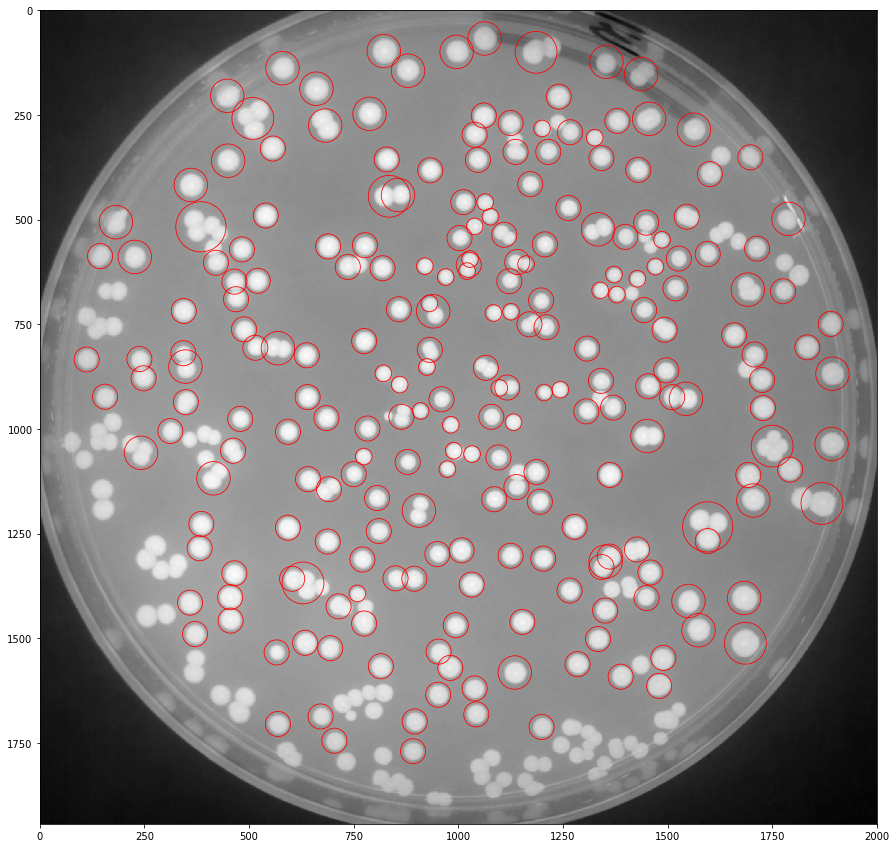

In [47]:
plt.figure(figsize=(15, 15))
plt.imshow(ng_image, cmap='gray')
#plt.hold(True)
for i in range(len(A)):
    circle = plt.Circle((A[i, 1], A[i, 0]), 2*A[i, 2], color='r', fill=False, lw=0.8)
    fig = plt.gcf()
    ax = fig.gca()
    ax.add_artist(circle)

In [48]:
# A is the number of colonies detected in the image

from scipy.spatial import distance

nA = len(A)
print(len(A))
R = np.arange(0, 2000, 100)
print(R)
nR = len(R)
print(len(R))
count = np.zeros((nA, nR))

for c1 in range(nA):
    j = A[c1, 0:2]
    xj = j[0]
    yj = j[1]
    sj = A[c1, 2]

    for c2 in range(nA):
        l = A[c2, 0:2]
        xl = l[0]
        yl = l[1] 
        sl = A[c2, 2]
       
        d = distance.euclidean(j, l)
        
        with open('Datos_Imagen_%s.txt' %arname, 'a') as f:
        
            print("Colony 1X : %f, Colony 1Y : %f, Colony 2X : %f, Colony 2Y : %f, Distance : %f" % (xj, yj, xl, yl, d), file=f)
               
        for r in range(nR):
            if d < R[r]:
                count[c1, r] += 1
                
print(count[:, :])

np.savetxt('Count_Imagen_%s.csv' %arname, count, fmt='%i', delimiter=",")

231
[   0  100  200  300  400  500  600  700  800  900 1000 1100 1200 1300 1400
 1500 1600 1700 1800 1900]
20
[[   0.    2.    5. ...,  228.  231.  231.]
 [   0.    2.    5. ...,  226.  231.  231.]
 [   0.    1.    5. ...,  231.  231.  231.]
 ..., 
 [   0.    2.    6. ...,  231.  231.  231.]
 [   0.    2.    5. ...,  231.  231.  231.]
 [   0.    2.    5. ...,  228.  231.  231.]]


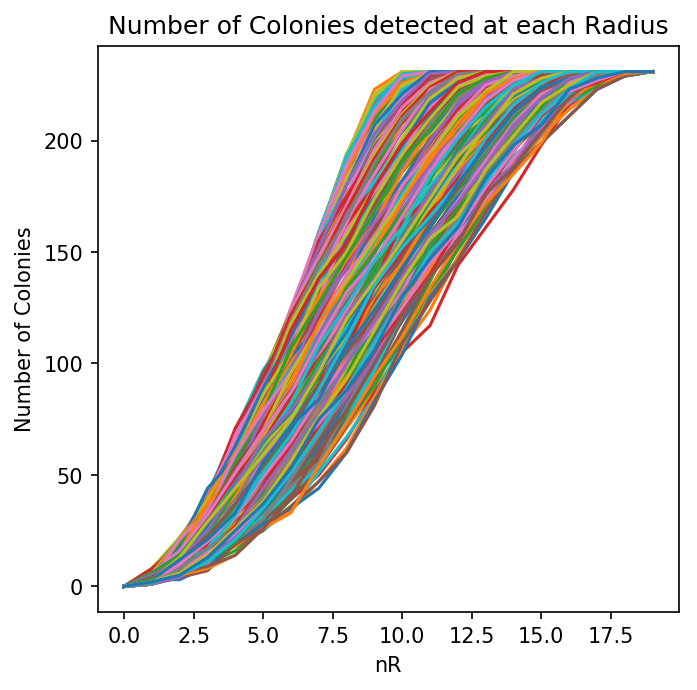

In [49]:
fig1 = plt.figure(figsize=(5, 5), dpi=150)
plt.plot(count.transpose())
plt.xlabel('nR')
plt.ylabel('Number of Colonies')
plt.title('Number of Colonies detected at each Radius')
plt.savefig('Gráfico_1_%s.png' %arname)
plt.show()

In [50]:
# This is C(r)
C = np.mean(count, 0)
print(C)
np.savetxt('Cr_Imagen_%s.csv' %arname, C, fmt='%f', delimiter=",")

[   0.            3.26839827   11.87445887   24.85281385   41.96103896
   61.87445887   83.45021645  106.32467532  128.35064935  149.68398268
  169.21645022  185.96969697  199.90909091  211.1038961   219.51948052
  225.32034632  228.91341991  230.47186147  230.95670996  231.        ]


/Users/jorgeriverosvergara/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


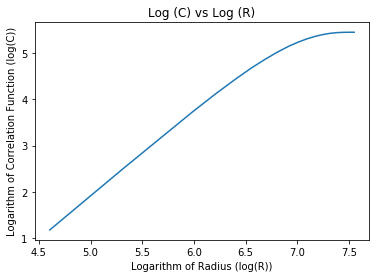

In [51]:
fig2 = plt.figure()
plt.plot(np.log(R), np.log(C))
plt.xlabel('Logarithm of Radius (log(R))')
plt.ylabel('Logarithm of Correlation Function (log(C))')
plt.title('Log (C) vs Log (R)')
plt.savefig('Gráfico_2_%s.png' %arname)
plt.show()

In [52]:
from scipy.stats import linregress
pendiente = linregress(np.log(R[1:N]), np.log(C[1:N]))
with open('Pendiente_Imagen_%s.txt' %arname, 'a') as g:
    print(pendiente, file=g)

NameError: name 'N' is not defined